In [12]:
#Import the dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#Creat a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [14]:
#Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [17]:
#Import the time libary and the datatime module from the datatime libaruy
import time
from datetime import datetime

In [22]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7d9f32f8c6fad2f22ebd04a2fc0f1921


In [25]:
#Create an empty list to hold the weather data
city_data = []
#Print the begining of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | solsvik
City not found. Skipping...
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | evensk
Processing Record 8 of Set 1 | girona
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ewo
Processing Record 11 of Set 1 | kyrksaeterora
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | russell
Processing Record 14 of Set 1 | wageningen
Processing Record 15 of Set 1 | solwezi
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | ion roata
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | adrar
Processing Record 21 of Set 1 | mudyuga
City not found. Skipping...
Proce

Processing Record 38 of Set 4 | conde
Processing Record 39 of Set 4 | cananeia
Processing Record 40 of Set 4 | saint anthony
Processing Record 41 of Set 4 | ossora
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | nikolayevsk-na-amure
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | waitara
Processing Record 50 of Set 4 | seoul
Processing Record 1 of Set 5 | babanusah
City not found. Skipping...
Processing Record 2 of Set 5 | kloulklubed
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | pinega
Processing Record 5 of Set 5 | brigantine
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | sorland
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | sitka
Processin

Processing Record 23 of Set 8 | kattivakkam
Processing Record 24 of Set 8 | te anau
Processing Record 25 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 26 of Set 8 | axim
Processing Record 27 of Set 8 | paamiut
Processing Record 28 of Set 8 | praia da vitoria
Processing Record 29 of Set 8 | kaiu
Processing Record 30 of Set 8 | manzhouli
Processing Record 31 of Set 8 | azul
Processing Record 32 of Set 8 | faanui
Processing Record 33 of Set 8 | gazimurskiy zavod
Processing Record 34 of Set 8 | tumut
Processing Record 35 of Set 8 | halalo
City not found. Skipping...
Processing Record 36 of Set 8 | qui nhon
Processing Record 37 of Set 8 | senmonorom
City not found. Skipping...
Processing Record 38 of Set 8 | constantine
Processing Record 39 of Set 8 | taksimo
Processing Record 40 of Set 8 | saleaula
City not found. Skipping...
Processing Record 41 of Set 8 | santa cruz de tenerife
Processing Record 42 of Set 8 | namatanai
Processing Record 43 of Set 8 | umzimvubu
City n

Processing Record 10 of Set 12 | mastic beach
Processing Record 11 of Set 12 | andenes
Processing Record 12 of Set 12 | rantoul
Processing Record 13 of Set 12 | lazaro cardenas
Processing Record 14 of Set 12 | prieska
Processing Record 15 of Set 12 | suozhen
Processing Record 16 of Set 12 | mangan
Processing Record 17 of Set 12 | alvarado
Processing Record 18 of Set 12 | wajir
Processing Record 19 of Set 12 | yelan-kolenovskiy
Processing Record 20 of Set 12 | kilrush
Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | osinki
Processing Record 23 of Set 12 | northam
Processing Record 24 of Set 12 | latung
Processing Record 25 of Set 12 | puerto lopez
Processing Record 26 of Set 12 | celestun
Processing Record 27 of Set 12 | iskateley
Processing Record 28 of Set 12 | fairview
Processing Record 29 of Set 12 | blonduos
City not found. Skipping...
Processing Record 30 of Set 12 | carutapera
Processing Record 31 of Set 12 | flinders
Processing Record 32 of Set 12 | mahina


In [26]:
#Convert the array of dictonaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.37,72,84,2.57,AR,2022-03-28 14:04:05
1,East London,-33.0153,27.9116,84.20,57,11,13.82,ZA,2022-03-28 14:08:46
2,Hermanus,-34.4187,19.2345,72.81,53,93,21.36,ZA,2022-03-28 14:08:47
3,Mar Del Plata,-38.0023,-57.5575,68.88,69,0,5.99,AR,2022-03-28 14:08:47
4,Rikitea,-23.1203,-134.9692,77.58,71,35,4.23,PF,2022-03-28 14:07:58
5,Evensk,61.9500,159.2333,14.43,79,100,27.11,RU,2022-03-28 14:08:47
6,Girona,41.9831,2.8249,71.89,45,0,4.61,ES,2022-03-28 14:04:06
7,Mataura,-46.1927,168.8643,55.45,95,100,1.34,NZ,2022-03-28 14:08:48
8,Ewo,-0.8725,14.8206,88.02,55,82,4.03,CG,2022-03-28 14:08:48
9,Kyrksaeterora,63.2906,9.0891,36.00,73,100,17.40,NO,2022-03-28 14:08:48


In [27]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df2 = city_data_df[new_column_order]

In [24]:
city_data_df2.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouakchott,MR,2022-03-27 15:11:28,18.0858,-15.9785,73.33,56,4,14.99
1,Jumla,NP,2022-03-27 15:11:29,29.2747,82.1838,50.14,46,2,5.26
2,San Quintin,MX,2022-03-27 15:11:29,30.4833,-115.9500,58.53,84,66,2.44
3,Ushuaia,AR,2022-03-27 15:10:24,-54.8000,-68.3000,47.82,70,83,7.87
4,Kapaa,US,2022-03-27 15:11:29,22.0752,-159.3190,67.98,88,49,3.44
5,Nikolskoye,RU,2022-03-27 15:11:30,59.7035,30.7861,32.88,62,81,11.18
6,Cervo,ES,2022-03-27 15:11:30,43.6702,-7.4101,59.23,68,21,2.89
7,Cape Town,ZA,2022-03-27 15:06:37,-33.9258,18.4232,82.35,30,84,3.18
8,Atuona,PF,2022-03-27 15:11:30,-9.8000,-139.0333,78.75,77,19,18.57
9,Ulaangom,MN,2022-03-27 15:11:30,49.9811,92.0667,13.12,88,100,3.18


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df2.to_csv(output_data_file, index_label="City_ID")

In [30]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df2["Lat"]
max_temps = city_data_df2["Max Temp"]
humidity = city_data_df2["Humidity"]
cloudiness = city_data_df2["Cloudiness"]
wind_speed = city_data_df2["Wind Speed"]

In [31]:
#Import the time module
import time
#Get today's date in seconds
today = time.time()
today

1648480595.4306095

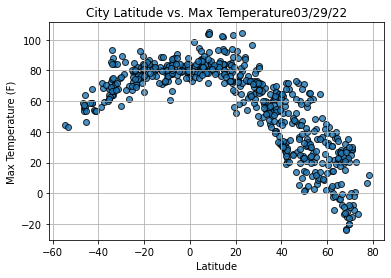

In [34]:
#Import time module
import time

#Build the scatter plot for the latitudes vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/fig.png")

#Show plot
plt.show()

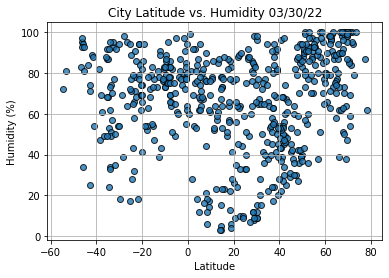

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

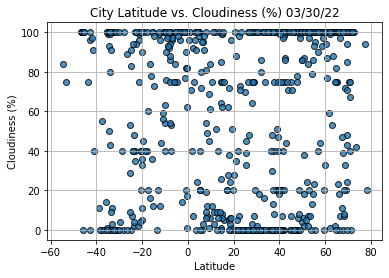

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

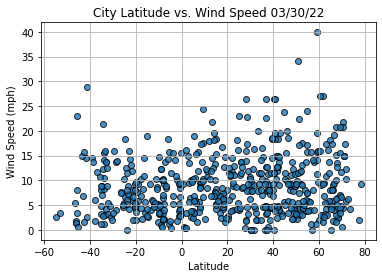

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()